In [2]:
import time
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
from random import randint, random
from typing import Callable, Any, Tuple, List, Optional, Dict
from tqdm import tqdm

In [3]:
from regex.generator import RegexGenerator
from regex.parser import RegexParser

In [4]:
def generate_stateful_regex(
        length: int,
        star_num: int, 
        star_nesting: int, 
        alphabet_size: int = 26) -> str:
    gen = RegexGenerator(length, star_num, star_nesting, alphabet_size)
    regex = ""
    while len(regex) != length:
        regex = gen.generate_regex()
    return regex



def generate_word(
        length: int, 
        alphabet_size: int = 26,
        alphabet: Optional[List[str]] = None) -> str:
    if alphabet is None:
        alphabet = list(string.ascii_lowercase)[:alphabet_size] + \
                   list(string.ascii_uppercase)[:alphabet_size]
    word = ''.join([alphabet[randint(0, len(alphabet) - 1)] for _ in range(length)])
    return word
    


def measure_time(func: Callable, *params) -> Tuple: # in seconds
    t1 = time.perf_counter()
    result = func(*params)
    t2 = time.perf_counter()
    return result, t2 - t1


def count_items_in_regex(regex: str, alphabet_size: int = 26) -> Tuple[int]:
    stars = 0
    letters = 0
    alphabet = list(string.ascii_lowercase)[:alphabet_size] + \
               list(string.ascii_uppercase)[:alphabet_size]
    for c in regex:
        if c in alphabet:
            letters += 1
        elif c == '*':
            stars += 1
    return letters, stars


def get_letters(word: str) -> List[str]:
    letters = set()
    alphabet = list(string.ascii_lowercase)[:alphabet_size] + \
               list(string.ascii_uppercase)[:alphabet_size]
    for c in word:
        if c in alphabet:
            letters.add(c)
    return list(letters)

## First view

In [5]:
regex_length = [i for i in range(5, 31, 5)]
alphabet_size = 26

In [6]:
results = {
    "regex": [],
    "length": [],
    "word": [],
    "matching_type": [],
    "time": [],
    "match": []
}

for length in regex_length:
    star_nesting = star_num = length // 2
    regex_str = generate_stateful_regex(length, star_num, star_nesting)
    letters, stars = count_items_in_regex(regex_str)
    word = generate_word(letters ** stars, alphabet=get_letters(regex_str))
    
    parser = RegexParser(regex_str, [100] * star_num)
    regex = parser.parse()
    nfa = regex.to_nfa()
    dfa = nfa.to_dfa()
    
    data = {
        "regex": regex,
        "nfa": nfa,
        "dfa": dfa
    }
    for k, v in data.items():
        match, t = measure_time(v.match, word)
        results["regex"].append(regex_str)
        results["length"].append(len(regex_str))
        results["word"].append(word)
        results["matching_type"].append(k)
        results["time"].append(t)
        results["match"].append(match)

In [7]:
df = pd.DataFrame(data=results)

In [8]:
df

,regex,length,word,matching_type,time,match
0,P*|L*,5,LLLP,regex,0.000031,False
1,P*|L*,5,LLLP,nfa,0.000066,False
2,P*|L*,5,LLLP,dfa,0.000009,False
3,pY*(U*)O*i,10,ppiOYiUYOUiUpiUUOpUpOUpYpUOYOpOYpYOUOUUiipUUpU...,regex,0.000030,False
4,pY*(U*)O*i,10,ppiOYiUYOUiUpiUUOpUpOUpYpUOYOpOYpYOUOUUiipUUpU...,nfa,0.000015,False
5,pY*(U*)O*i,10,ppiOYiUYOUiUpiUUOpUpOUpYpUOYOpOYpYOUOUUiipUUpU...,dfa,0.000004,False
6,(z*|V|(b*))*(a),15,VVzazaVbzVazaVVaVVbbbzzVbazbbzzbazVbzbbVbzVzaV...,regex,0.000045,False
7,(z*|V|(b*))*(a),15,VVzazaVbzVazaVVaVVbbbzzVbazbbzzbazVbzbbVbzVzaV...,nfa,0.000065,False
8,(z*|V|(b*))*(a),15,VVzazaVbzVazaVVaVVbbbzzVbazbbzzbazVbzbbVbzVzaV...,dfa,0.000005,False
9,(E|A)i|(h*g*QlN(R))*,20,RRhREAQhhghhhAggRlighQiNliAiNNiiAgAglRgghNAAQR...,regex,0.000020,False


In [9]:
df.to_csv('./experiments/matching_time.csv', index=False)

## Dependence of time on length

In [10]:
def plot_dependence(df: pd.DataFrame):
    plt.figure(figsize=(10, 5))
    xs = df['length'][::3] 
    types = df['matching_type'].unique()
    for label in types:
        plt.plot(xs, df[df['matching_type'] == label]['time'], label=label)
    plt.ylabel('Time, sec')
    plt.xlabel('Step')
    plt.legend()
    plt.show();


def test(
        generate_word_group: Callable, 
        regex_str: str, 
        step: int = 10, max_n: int = 50,
        plot: bool = True) -> pd.DataFrame:
    words = generate_word_group(step, max_n)
    regex = RegexParser(regex_str, [max_n ** 2] * regex_str.count('*')).parse()
    nfa = regex.to_nfa()
    dfa = nfa.to_dfa()

    data = {
        "regex": regex,
        "nfa": nfa,
        "dfa": dfa
    }
    results = {
        "length": [],
        "matching_type": [],
        "time": [],
        "match": []
    }
    
    for word in words:
        for k, v in data.items():
            match, t = measure_time(v.match, word)
            results["length"].append(len(word))
            results["matching_type"].append(k)
            results["time"].append(t)
            results["match"].append(match)
            
    df = pd.DataFrame(data=results)
    if plot:
        plot_dependence(df)
    return df

#### Word pattern: a^n b

In [11]:
def generate_word_group_1(step: int = 10, max_n: int = 50) -> List[str]:
    return ['a' * n + 'b' for n in range(0, max_n + 1, step)]

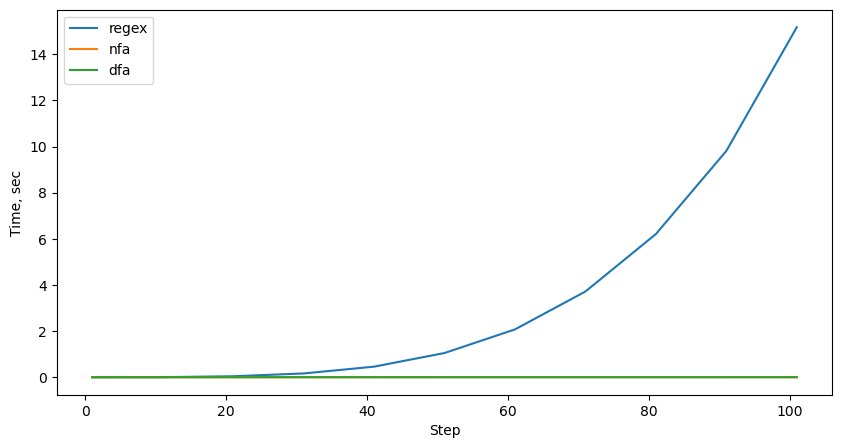

In [12]:
df = test(generate_word_group_1, '((((a)*a)*a)*a)*', 10, 100)

In [13]:
df[df['matching_type'] == 'regex']

,length,matching_type,time,match
0,1,regex,0.000049,False
3,11,regex,0.004167,False
6,21,regex,0.041435,False
9,31,regex,0.163452,False
12,41,regex,0.458367,False
15,51,regex,1.049416,False
18,61,regex,2.073370,False
21,71,regex,3.716489,False
24,81,regex,6.208203,False
27,91,regex,9.811605,False


In [14]:
df[df['matching_type'] == 'nfa']

,length,matching_type,time,match
1,1,nfa,0.000027,False
4,11,nfa,0.000253,False
7,21,nfa,0.000738,False
10,31,nfa,0.000710,False
13,41,nfa,0.000939,False
16,51,nfa,0.001162,False
19,61,nfa,0.001388,False
22,71,nfa,0.001606,False
25,81,nfa,0.001796,False
28,91,nfa,0.002015,False


In [15]:
df[df['matching_type'] == 'dfa']

,length,matching_type,time,match
2,1,dfa,0.000003,False
5,11,dfa,0.000007,False
8,21,dfa,0.000011,False
11,31,dfa,0.000014,False
14,41,dfa,0.000016,False
17,51,dfa,0.000019,False
20,61,dfa,0.000023,False
23,71,dfa,0.000027,False
26,81,dfa,0.000030,False
29,91,dfa,0.000033,False


In [16]:
df.to_csv('./experiments/pattern_1.csv', index=False)

####  Word pattern: (a^n)(b^n)ab

In [17]:
def generate_word_group_2(step: int = 10, max_n: int = 50) -> List[str]:
    return ['a' * n + 'b' * n + 'ab' for n in range(0, max_n + 1, step)]

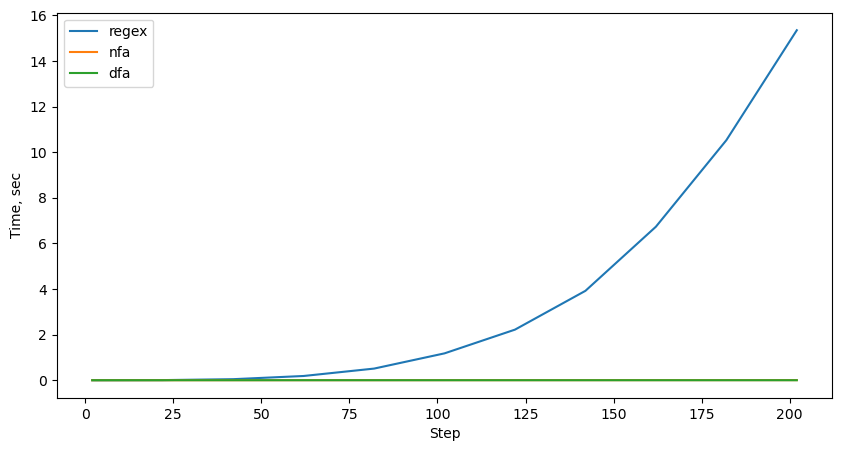

In [18]:
df = test(generate_word_group_2, '((((a)*a)*a)*a)*(((b)*b)*b)*ab', 10, 100)

In [19]:
df

,length,matching_type,time,match
0,2,regex,0.000085,True
1,2,nfa,0.000068,True
2,2,dfa,0.000004,True
3,22,regex,0.004970,True
4,22,nfa,0.000485,True
5,22,dfa,0.000011,True
6,42,regex,0.045679,True
7,42,nfa,0.000925,True
8,42,dfa,0.000019,True
9,62,regex,0.185862,True


In [20]:
df[df['matching_type'] == 'regex']

,length,matching_type,time,match
0,2,regex,0.000085,True
3,22,regex,0.004970,True
6,42,regex,0.045679,True
9,62,regex,0.185862,True
12,82,regex,0.510040,True
15,102,regex,1.177989,True
18,122,regex,2.218460,True
21,142,regex,3.919657,True
24,162,regex,6.730600,True
27,182,regex,10.523552,True


In [21]:
df[df['matching_type'] == 'nfa']

,length,matching_type,time,match
1,2,nfa,0.000068,True
4,22,nfa,0.000485,True
7,42,nfa,0.000925,True
10,62,nfa,0.001389,True
13,82,nfa,0.001798,True
16,102,nfa,0.002259,True
19,122,nfa,0.002662,True
22,142,nfa,0.003184,True
25,162,nfa,0.003925,True
28,182,nfa,0.003954,True


In [22]:
df[df['matching_type'] == 'dfa']

,length,matching_type,time,match
2,2,dfa,0.000004,True
5,22,dfa,0.000011,True
8,42,dfa,0.000019,True
11,62,dfa,0.000025,True
14,82,dfa,0.000034,True
17,102,dfa,0.000038,True
20,122,dfa,0.000046,True
23,142,dfa,0.000050,True
26,162,dfa,0.000057,True
29,182,dfa,0.000061,True


In [23]:
df.to_csv('./experiments/pattern_2.csv', index=False)